In [1]:
pip install snscrape

Note: you may need to restart the kernel to use updated packages.


In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def scrape(username,max_tweets):
    tweets_list1 = []
    ll = ['from',username]
    l = ':'
    l = l.join(ll)
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(l).get_items()):
        if i>max_tweets-1:
            break
        tweets_list1.append([tweet.content])
    tweets_df1 = pd.DataFrame(tweets_list1, columns=['Text'])
    return(tweets_df1)

df1 = scrape('elonmusk',10**4)
df1

,Text
0,"You might notice small, sometimes major, impro..."
1,Tesla Full Self-Driving Beta is now available ...
2,@TomFitton That’s the general idea
3,@ramzpaul Removing child exploitation is prior...
4,@joevezz Oh we have quite the adventure ahead!
...,...
9995,@nichegamer The crypto scam level on Twitter i...
9996,@MarcelMeijer @Tesla Yes
9997,@engineers_feed We should make buildings out o...
9998,@austinhwade Nice


In [4]:
df = df1['Text']  # makes df a series

all_sentences = [] # make a list whose each element is a single tweet
for word in df:
    all_sentences.append(word)
print(all_sentences)

['You might notice small, sometimes major, improvements in speed of Twitter. Will be especially significant in countries far away from USA.', 'Tesla Full Self-Driving Beta is now available to anyone in North America who requests it from the car screen, assuming you have bought this option. \n\nCongrats to Tesla Autopilot/AI team on achieving a major milestone!', '@TomFitton That’s the general idea', '@ramzpaul Removing child exploitation is priority #1. Please reply in comments if you see anything that Twitter needs to address.', '@joevezz Oh we have quite the adventure ahead!', 'Reducing the max allowed tweets/day to a number below what a speed typist on meth could do was helpful', 'I have half a mind to wag my finger at the 1500 accounts that caused the spike, but I shall forebear 🙄', '@alx @nypost This is necessary to restore public trust', '@JohnathonWillow Yeah, these are umm … bad words. I read through the list last week &amp; have to say I learned a few things 😳!!', '@TheKameroo

In [5]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [8]:
pos, neg, neu, oberall, positive, negative, neutral = ([] for i in range(7))

for i in range(len(df)):  
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(df[i])
    pos.append(sentiment_dict['pos']*100)
    neg.append(sentiment_dict['neg']*100)
    neu.append(sentiment_dict['neu']*100)
    if sentiment_dict['compound'] >= 0.05 :
         positive.append(1)
    elif sentiment_dict['compound'] <= - 0.05 :
        negative.append(-1)
    else :
        neutral.append(0)

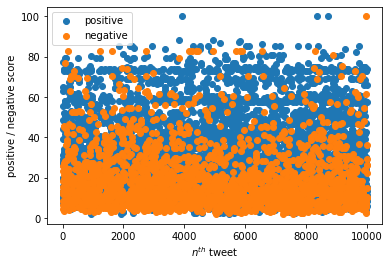

In [9]:
def zero_to_nan(sample): 
    return [np.nan if x==0 else x for x in sample]
pos,neg = zero_to_nan(pos),zero_to_nan(neg)

plt.scatter(np.arange(1,len(df)+1,1),pos,label='positive')
plt.scatter(np.arange(1,len(df)+1,1),neg,label='negative')
plt.xlabel('$n^{th}$ tweet')
plt.ylabel('positive / negative score')
plt.legend(loc='best')
plt.show()

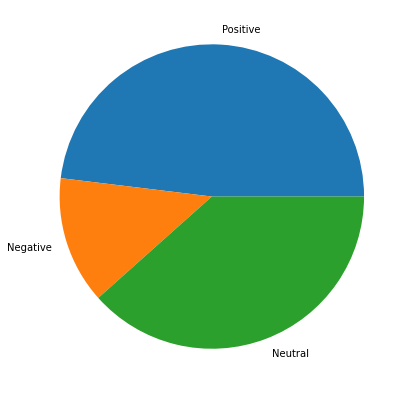

In [10]:
sentiments = ['Positive', 'Negative', 'Neutral']
analysis = [len(positive),len(negative),len(neutral)]
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(analysis, labels = sentiments)
plt.show()

In [11]:
df = df1['Text']
all_sentences = []
for word in df:
    all_sentences.append(word)

lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
        lines.append(w)

import re
lines = [re.sub(r'[^@A-Za-z0-9]+', '', x) for x in lines]
print(lines)

['You', 'might', 'notice', 'small', 'sometimes', 'major', 'improvements', 'in', 'speed', 'of', 'Twitter', 'Will', 'be', 'especially', 'significant', 'in', 'countries', 'far', 'away', 'from', 'USA', 'Tesla', 'Full', 'SelfDriving', 'Beta', 'is', 'now', 'available', 'to', 'anyone', 'in', 'North', 'America', 'who', 'requests', 'it', 'from', 'the', 'car', 'screen', 'assuming', 'you', 'have', 'bought', 'this', 'option', 'Congrats', 'to', 'Tesla', 'AutopilotAI', 'team', 'on', 'achieving', 'a', 'major', 'milestone', '@TomFitton', 'Thats', 'the', 'general', 'idea', '@ramzpaul', 'Removing', 'child', 'exploitation', 'is', 'priority', '1', 'Please', 'reply', 'in', 'comments', 'if', 'you', 'see', 'anything', 'that', 'Twitter', 'needs', 'to', 'address', '@joevezz', 'Oh', 'we', 'have', 'quite', 'the', 'adventure', 'ahead', 'Reducing', 'the', 'max', 'allowed', 'tweetsday', 'to', 'a', 'number', 'below', 'what', 'a', 'speed', 'typist', 'on', 'meth', 'could', 'do', 'was', 'helpful', 'I', 'have', 'half', 

In [12]:
mentions = pd.DataFrame([x for x in lines if x.startswith('@')])
mentions[0].value_counts()

@WholeMarsBlog     458
@PPathole          456
@SpaceX            400
@teslaownersSV     387
@Erdayastronaut    350
                  ... 
@BallAerospace       1
@TheCryptoCPA        1
@samifouad           1
@AlbiSideArms        1
@austinhwade         1
Name: 0, Length: 3211, dtype: int64

In [19]:
df2 = df1.iloc[df.str.contains(pat = '@SpaceX')[df.str.contains(pat = '@SpaceX')].index.values]
df2

,Text
311,"@SenBillNelson @NASA @SpaceX Much appreciated,..."
412,@jessica_kirsh @SpaceX @TeslaAIBot @Tesla Cool :)
711,@Erdayastronaut @SpaceForceDoD @SLDelta45 @Spa...
844,@MarcusHouse @LordofEa @kerrikgray @chicago_gl...
854,@LordofEa @kerrikgray @chicago_glenn @Tesla @t...
...,...
9664,"@KMastersBarnes @SpaceX Yeah, most reflights e..."
9692,@Erdayastronaut @SpaceX @BoeingSpace @ulalaunc...
9788,@SpaceX Testing Raptor in vertical configurati...
9911,@RationalEtienne @JedIKni64072970 @archillect ...


In [20]:
df2 = df2['Text']  #to make df a series

df = []
for word in df2:
    df.append(word)
print(df)

['@SenBillNelson @NASA @SpaceX Much appreciated, SpaceX will not let NASA down!', '@jessica_kirsh @SpaceX @TeslaAIBot @Tesla Cool :)', '@Erdayastronaut @SpaceForceDoD @SLDelta45 @SpaceX Falcon Heavy is a testament to the awesomeness of humanity', '@MarcusHouse @LordofEa @kerrikgray @chicago_glenn @Tesla @teslaownersSV @dvorahfr @TonyadeVitti @SpaceX @SirineAti That’s the plan, unless it is damaged in testing. What really matters is that ship &amp; booster production line is spooling up. Also, each new ship &amp; booster has incremental design improvements.', '@LordofEa @kerrikgray @chicago_glenn @Tesla @teslaownersSV @dvorahfr @TonyadeVitti @SpaceX @SirineAti Absolutely!', '@muskQu0tes @SpaceX Had to be done', '@jamesplloyd @SpaceX I do. Yes.', 'Congrats to @SpaceX team on 48th launch this year! Falcon 9 now holds record for most launches of a single vehicle type in a year.', '@SpaceX 🎯', '@TeslaAIBot @SpaceX @Tesla Thanks Optimus :)', '@SawyerMerritt @SpaceX To be precise, 25,300 term

In [21]:
pos, neg, neu, oberall, positive, negative, neutral = ([] for i in range(7))
for i in range(len(df)):  
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(df[i])
    pos.append(sentiment_dict['pos']*100)
    neg.append(sentiment_dict['neg']*100)
    neu.append(sentiment_dict['neu']*100)
    if sentiment_dict['compound'] >= 0.05 :
        positive.append(1)
 
    elif sentiment_dict['compound'] <= - 0.05 :
        negative.append(-1)
 
    else :
        neutral.append(0)

def zero_to_nan(sample):
    return [np.nan if x==0 else x for x in sample]
pos,neg = zero_to_nan(pos),zero_to_nan(neg)

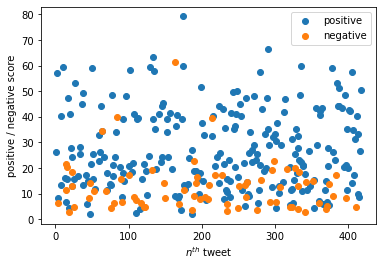

In [22]:
plt.scatter(np.arange(1,len(df)+1,1),pos,label='positive')
plt.scatter(np.arange(1,len(df)+1,1),neg,label='negative')
plt.xlabel('$n^{th}$ tweet')
plt.ylabel('positive / negative score')
plt.legend(loc='best')
plt.show()

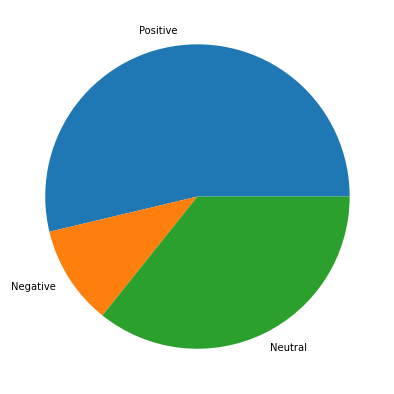

In [23]:
sentiments = ['Positive', 'Negative', 'Neutral']
analysis = [len(positive),len(negative),len(neutral)]
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(analysis, labels = sentiments)
plt.show()